###                                                                Crime Data Analysis 

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #To ignore the warning

In [2]:
import pymysql as pms
connection=pms.connect(host="localhost",user="root",password="Shanu@54",database="Project")

In [4]:
q="select * from crime_data"
df=pd.read_sql(q,connection)
df

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,200106614,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,33,M,SIDEWALK,IC,2400 ELLENDALE PL,34.05,-118.26
495,200106615,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,39TH PL,34.05,-118.26
496,200106616,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,35,M,OTHER STORE,IC,2500 W VERNON AV,34.05,-118.25
497,200106617,02-07-2020,01-10-2020,Central,510,VEHICLE - STOLEN,0,F,PARKING LOT,IC,700 EXPOSITION BL,34.05,-118.25


In [38]:
df.info()    #Here we can see description of column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DR_NO        499 non-null    int64  
 1   Date_Rptd    499 non-null    object 
 2   DATE_OCC     499 non-null    object 
 3   AREA_NAME    499 non-null    object 
 4   Crm_Cd       499 non-null    int64  
 5   Crm_Cd_Desc  499 non-null    object 
 6   Vict_Age     499 non-null    int64  
 7   Vict_Sex     499 non-null    object 
 8   Premis_Desc  499 non-null    object 
 9   Status       499 non-null    object 
 10  Location     499 non-null    object 
 11  LAT          499 non-null    float64
 12  LON          499 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 50.8+ KB


In [39]:
df.nunique() #Unique value in each column.

DR_NO          499
Date_Rptd       68
DATE_OCC        61
AREA_NAME       19
Crm_Cd          42
Crm_Cd_Desc     42
Vict_Age        66
Vict_Sex         4
Premis_Desc     67
Status           4
Location       365
LAT             35
LON             29
dtype: int64

In [40]:
df_subset = df[['Crm_Cd', 'Crm_Cd_Desc']]
distinct_values = df_subset.drop_duplicates(subset=['Crm_Cd']) #Distinct crime code with their descriptions
distinct_values

,Crm_Cd,Crm_Cd_Desc
0,624,BATTERY - SIMPLE ASSAULT
2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER)
3,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
4,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER)
5,946,OTHER MISCELLANEOUS CRIME
6,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI..."
7,330,BURGLARY FROM VEHICLE
8,930,CRIMINAL THREATS - NO WEAPON DISPLAYED
10,648,ARSON
12,354,THEFT OF IDENTITY


In [41]:
df['Date_Rptd'].value_counts()  #Crime count according to each reported date.

Date_Rptd
01-11-2020    42
01-12-2020    34
02-02-2020    31
01-02-2020    30
01-08-2020    27
              ..
10-10-2020     1
08-06-2022     1
12-01-2021     1
02-03-2022     1
02-11-2020     1
Name: count, Length: 68, dtype: int64

In [42]:
df['Vict_Sex'].value_counts() #Count of victims based on victim sex.

Vict_Sex
M    278
F    155
X     39
      27
Name: count, dtype: int64

In [15]:
#Temporal Analysis:
#  Trends in Crime occurrence overt the time.

q1="""SELECT DATE_FORMAT(STR_TO_DATE(Date_occ, '%d-%m-%Y'), '%b') AS month,count(dr_no) no_of_crimes
FROM crime_data group by month"""
df1=pd.read_sql(q1,connection)
pd.read_sql(q1,connection)
df2=df1.sort_values(by='month', key=lambda x: pd.to_datetime(x, format='%b').dt.month)
df2

,month,no_of_crimes
1,Jan,71
2,Feb,52
7,Mar,48
3,Apr,53
4,May,47
8,Jun,46
5,Jul,36
0,Aug,30
6,Sep,18
11,Oct,28


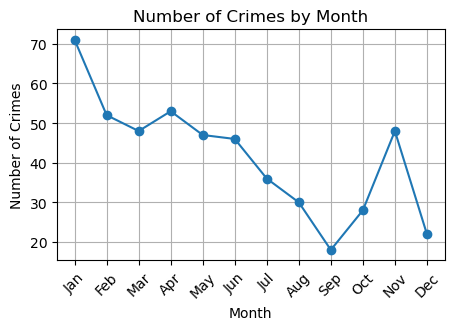

In [16]:
#  Trends in Crime occurrence overt the time.
#    By line plot:

plt.figure(figsize=(5, 3))
plt.plot(df2['month'],df2['no_of_crimes'],marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Month')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

In [17]:
#Observation:
  #The plot indicates the variation in the number of crimes reported over the months of the year.
  #January and April have the highest number of reported crimes, with 71 and 53 cases, respectively.
  # least crime occured in (sept).

  #The number of reported crimes tends to fluctuate throughout the year.
  #There is a noticeable decrease in reported crimes during the middle months of the year, particularly in July (Jul) and August (Aug), where the counts are relatively lower compared to other months.
  #Towards the end of the year, in November (Nov) and December (Dec), the number of reported crimes starts to decrease again.

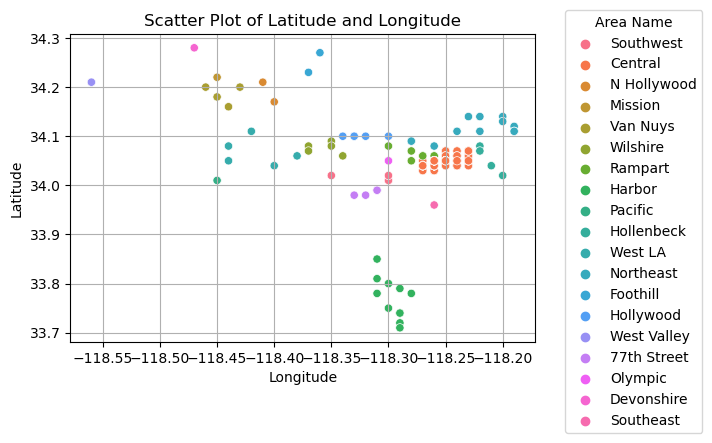

In [18]:
#Spatial Analysis:  (Scatter plot)
  # Q. what are the Geographical hotspot for the reported crime?

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='LON', y='LAT', color='blue', hue='AREA_NAME')
plt.title('Scatter Plot of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title="Area Name", bbox_to_anchor=(1.05, 1.1), loc='upper left')
plt.grid(True)
plt.show()    


In [19]:
#observation:
  #Areas with higher concentrations of red dots indicate potential hotspots for reported crimes.
  #These hotspots can be areas with higher crime rates or locations where crimes are more frequently reported.

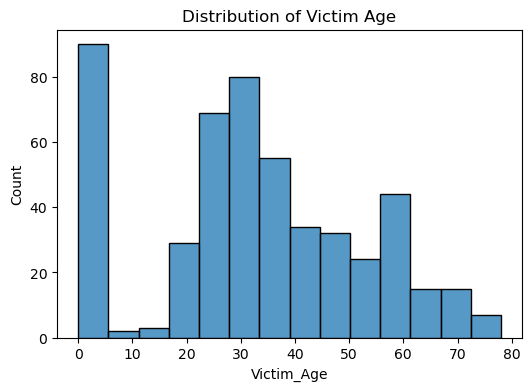

In [20]:
#Victim Demographics:
  #Distribution of victim age.
    
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Vict_Age')
plt.title('Distribution of Victim Age')
plt.xlabel('Victim_Age')
plt.show()

In [21]:
#Observation:
  #The histogram shows the distribution of victim ages in reported crimes.
  #The majority of victims seem to be in their 20s to 40s, as evidenced by the higher frequency of ages in that range.
  #There are some instances of victims with ages close to 0, which could indicate missing or unknown age information.
  

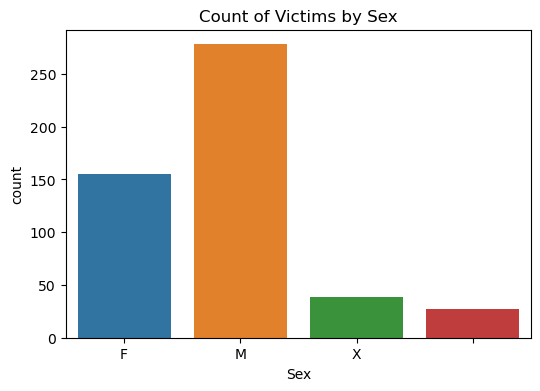

In [23]:
#Distribution of victim genders.(count plot)

plt.figure(figsize=(6,4))
sns.countplot(x=df['Vict_Sex'])
plt.title('Count of Victims by Sex')
plt.xlabel('Sex')
plt.show()

In [24]:
#Obervation:
  #The countplot shows the distribution of victim sex in reported crimes.
  #The majority of victims are male (M) with 278 reported cases.
  #Female victims (F) come next with 155 reported cases.
  #There are fewer cases with an unknown or unspecified gender (X) with only 39 reported cases.
  #Additionally, there are 27 cases where the victim sex is not specified.

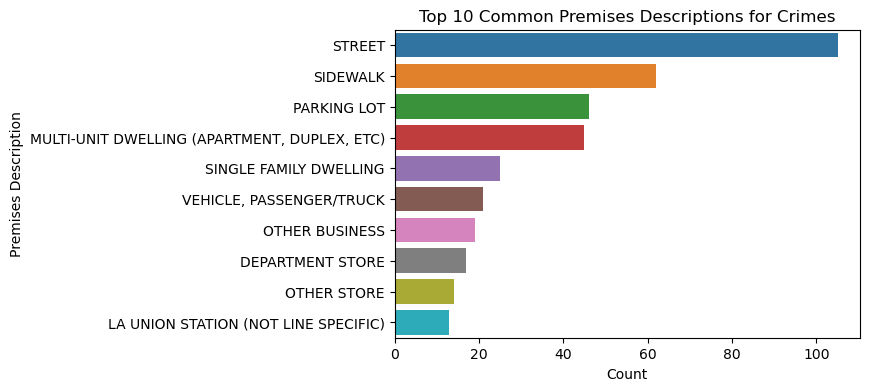

In [25]:
#Common primises description where crimes occures:

plt.figure(figsize=(6,4))
sns.countplot(data=df, y='Premis_Desc', order=df['Premis_Desc'].value_counts().index[:10])
plt.title('Top 10 Common Premises Descriptions for Crimes')
plt.xlabel('Count')
plt.ylabel('Premises Description')
plt.show()

In [26]:
#Observation:
  #The premises descriptions with the highest counts include: STREET, SIDEWALK, PARKING LOT, and MULTI-UNIT DWELLING.
  #STREET and SIDEWALK appear to be the most common locations for reported crimes, followed by PARKING LOT and MULTI-UNIT DWELLING.

In [31]:
#Location Analysis:
  # Q. Where do most crimes occures based on location column?----(800 N ALAMEDA ST: 14)
df['Location'].value_counts().head(10)

Location
800 N ALAMEDA ST      14
700 W 7TH ST          11
1100 S FIGUEROA ST     6
300 E 5TH ST           6
6TH                    6
100 E 5TH ST           5
600 S SPRING ST        5
500 S SAN PEDRO ST     5
7TH ST                 5
700 S FLOWER ST        4
Name: count, dtype: int64

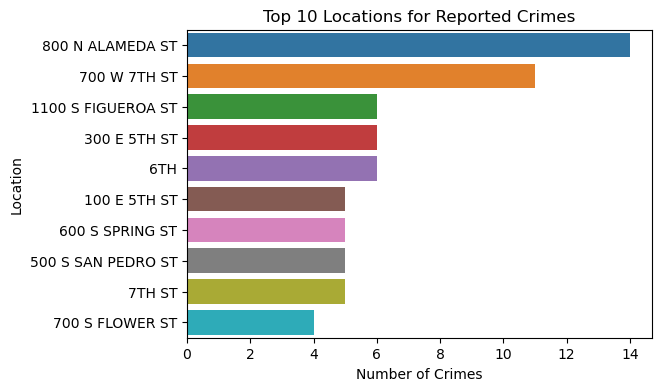

In [32]:
# most crimes occures based on location by (Countplot)

plt.figure(figsize=(6,4))
sns.countplot(data=df, y='Location', order=df['Location'].value_counts().index[:10])
plt.title('Top 10 Locations for Reported Crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('Location')
plt.show()

In [33]:
#Observation:
  # Most of the crimes are reported on 800 Noth ALAMEDA St. that is 14 crimes are reported.

In [34]:
# Status Analysis:
  # Analysis the status of reported crime.
df['Status'].value_counts()

Status
IC    447
AA     27
AO     24
JO      1
Name: count, dtype: int64

<Axes: ylabel='count'>

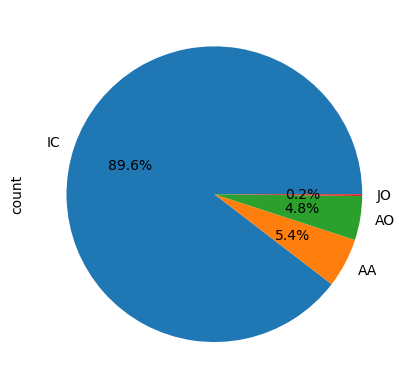

In [35]:
 # Analysis the status of reported crime by pie plot.
    
status = df['Status'].value_counts()
status.plot(kind='pie',autopct='%1.1f%%')    

In [36]:
#Observation:
 ##The Investigation of most of the reported crimes has been closed ie.(IC-Investigation Complete).
 ##IC (Investigation Complete),AA (Administrative Closure), AO (Administrative Other), and JO (Juvenile Other).

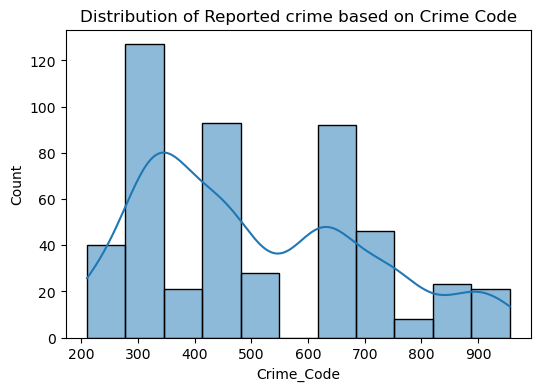

In [37]:
# Crime Code Analysis.
  # Distribution of reported crime based on crime code.
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Crm_Cd',edgecolor='black', kde=True)
plt.title('Distribution of Reported crime based on Crime Code')
plt.xlabel('Crime_Code')
plt.show()    

#### From this analysis, we got to the insights into the spatial and temporal patterns of crime occurrences, understood the demographics of victims, identify common crime locations, and analyze the distribution of reported crimes based on crime codes. These insights can help law enforcement agencies, policymakers, and communities to better understand and address crime-related issues.